<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:**

Il set di dati CalCOFI rappresenta la serie temporale più lunga (1949-oggi) e più completa (più di 50.000 stazioni di campionamento) di dati oceanografici e larvali di pesci nel mondo. Include dati sull'abbondanza delle larve di oltre 250 specie di pesci; dati sulla frequenza della lunghezza larvale e dati sull'abbondanza di uova su specie commerciali chiave; e dati oceanografici e planctonici. I dati fisici, chimici e biologici raccolti a intervalli regolari di tempo e spazio sono diventati rapidamente preziosi per documentare i cicli climatici nella Corrente della California e una serie di risposte biologiche ad essi.


**OBIETTIVO:** 

Rispondere alle seguenti domande analizzando e creando uno o più modelli predittivi, utilizzando i vari algoritmi visti a lezione (albero decisionale regressore, regressione lineare etc..) a partire dai dati a disposizione:

-------------------------------------------------------------------------
- Esiste una relazione tra salinità dell'acqua e temperatura dell'acqua? Giustifica la tua risposta con l'output del tuo modello predittivo
- Puoi prevedere la temperatura dell'acqua in base alla salinità?


**DATI A DISPOSIZIONE:**

Da questo link puoi scaricare i dati necessari:

https://www.kaggle.com/datasets/sohier/calcofi




In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("bottle.csv")
data.head()

C:\Users\alexf\AppData\Local\Temp\ipykernel_13272\614980128.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Selezioniamo dal dataset base le prime 500 righe e le due sole colonne di interesse ovvero temperatura e salinità e facciamo una prima esplorazione sulle osservazioni.

In [15]:
dati = data.iloc[:500][['T_degC', 'Salnty']]
dati.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_degC  499 non-null    float64
 1   Salnty  494 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [17]:
dati.info()
dati.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_degC  499 non-null    float64
 1   Salnty  494 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
5,10.45,33.431
6,10.45,33.440
7,10.24,33.424
8,10.06,33.420
9,9.86,33.494


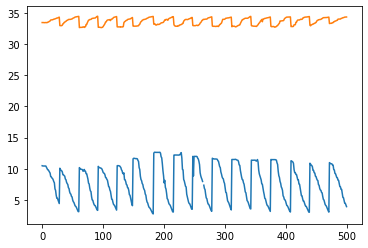

In [9]:
import matplotlib.pyplot as plt 

plt.plot(dati)
plt.show()

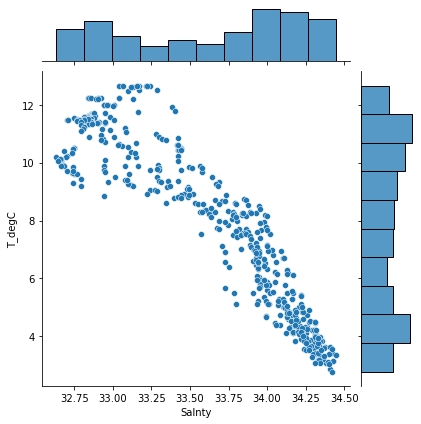

In [10]:
import seaborn as sns
sns.jointplot(data=dati, x="Salnty", y="T_degC")

Sembra emergere abbastanza chiaramente una relazione lineare tra le due variabili, all'aumentare della temperatura diminuisce la salinità. Essendoci solo 6 righe dove i valori sono nulli, li cancelliamo.

In [18]:
dati = dati.dropna()

In [19]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_degC  493 non-null    float64
 1   Salnty  493 non-null    float64
dtypes: float64(2)
memory usage: 11.6 KB


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(dati['Salnty'], dati['T_degC'], test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regr = LinearRegression()
regr.fit(np.array(X_train).reshape(-1, 1), np.array(Y_train))


LinearRegression()

In [29]:
y_pred = regr.predict(np.array(X_test).reshape(-1, 1))
y_pred

array([ 5.22126349,  8.94481696, 11.56347286,  4.35000065,  5.38188736,
        6.03411764, 11.23735772,  4.29159197,  9.41208641,  8.4775475 ,
        7.25096518,  6.85183919, 10.88203824,  9.01782781,  9.48996465,
        9.17845168,  6.51598927, 11.17894904,  6.31642627,  5.52790907,
        4.39867455, 10.16653189,  4.94382225, 10.23954274, 12.53695089,
       12.37145963,  7.05626958,  7.04166741,  6.37483496, 12.53695089,
       10.72141436,  6.77396095,  6.01464808,  8.75498874,  5.37701997,
        6.3018241 ,  4.95842442,  9.85015153,  4.89514835, 12.09888578,
        8.74038657,  4.06769202,  9.7138646 , 11.70949456,  8.74038657,
        8.05895195,  6.01464808,  4.50575714,  5.27967217, 10.08378625,
        5.67879816,  6.51112188,  7.54300859,  4.51062453,  6.11199589,
        4.45221584,  8.54569096,  4.70532013, 11.17408165,  4.34513326,
        9.8112124 ,  7.25583257,  7.7863781 ,  5.04117005,  4.59337016,
       11.45639028, 11.53426852, 12.02587492, 11.46612506, 11.17

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" % RMSE)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 1.19
Root Mean squared error: 1.09
Coefficient of determination: 0.84


Già con questo primo regressore, la dipendenza lineare risulta confermata, il risultato è buono. Ora proviamo il regressore Random Forest.

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(np.array(X_train).reshape(-1, 1), np.array(Y_train))

RandomForestRegressor()

In [32]:
y_pred = rfr.predict(np.array(X_test).reshape(-1, 1))

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" %RMSE)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1.19
Root Mean squared error: 1.09
Coefficient of determination: 0.84


Il regressore RandomForest che opera tramite alberi decisionali dà un risultato leggermente migliore, confermando la dipendenza lineare tra le due variabili con un valore ancora maggiore di dipendenza lineare (0,84 VS 0,82) e uno scarto quadratico medio più basso (1,19 VS 1,34).
In ultimo proviamo il regressore XGBoost.

In [ ]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear')
xgb_r.fit(X_train, Y_train)
pred = xgb_r.predict(X_test)
 
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("")
print("RMSE : % f" %(rmse))
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

In [59]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10)
xgb_r.fit(X_train, Y_train)
pred = xgb_r.predict(X_test)
 
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("")
print("RMSE : % f" %(rmse))
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))


[12:17:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.

RMSE :  0.964017
Mean squared error: 0.93
Coefficient of determination: 0.88


XGBoost si conferma il miglior modello di regressione applicabile, garantendo un errore più basso e un maggior grado di aderenza ai dati.
In conclusione possiamo dire che la temperatura dell'acqua è prevedibile in base alla salinità.